In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mfpml.problems.multifidelity_functions import *
from scipy.stats import spearmanr
from mfpml.design_of_experiment import MFSobolSequence

In [2]:
# calculate the correlation of each function
problem_sets = [
    "mf_Bohachevsky",
    "mf_Booth",
    "mf_Borehole",
    "mf_CurrinExp",
    "mf_Hartman3",
    "mf_Hartman6",
    "mf_Himmelblau",
    "mf_Park91A",
    "mf_Park91B",
    "mf_Sixhump",
]
# create an array to store the correlation
correlation_array = pd.DataFrame(
    np.zeros((len(problem_sets), 3)), columns=["function", "correlation", "dimension"]
)
for name in problem_sets:
    func = eval(name)()
    # get samplers
    sampler = MFSobolSequence(design_space=func.design_space, nested=True)
    # sample the function
    samples = sampler.get_samples(num_lf_samples=1000, num_hf_samples=1000)
    responses = func(samples)
    # calculate the correlation
    r2 = spearmanr(responses["hf"], responses["lf"])
    # save the correlation
    correlation_array.loc[problem_sets.index(name), "function"] = name
    correlation_array.loc[problem_sets.index(
        name), "correlation"] = r2.correlation
    correlation_array.loc[problem_sets.index(name), "dimension"] = func.num_dim

    print("=====================================")
    print("Function: ", name)
    print("Correlation: ", r2.correlation)
    print("Dimension: ", func.num_dim)
    print("=====================================")
# print(correlation_array)
correlation_array

Function:  mf_Bohachevsky
Correlation:  0.8942052302052304
Dimension:  2
Function:  mf_Booth
Correlation:  0.8220090780090781
Dimension:  2
Function:  mf_Borehole
Correlation:  0.9999999879999882
Dimension:  8
Function:  mf_CurrinExp
Correlation:  0.9972042492042492
Dimension:  2
Function:  mf_Hartman3
Correlation:  -0.2675776475776476
Dimension:  3
Function:  mf_Hartman6
Correlation:  0.7372856212856214
Dimension:  6
Function:  mf_Himmelblau
Correlation:  0.8230726390726392
Dimension:  2
Function:  mf_Park91A
Correlation:  0.9925255165255166
Dimension:  4
Function:  mf_Park91B
Correlation:  1.0
Dimension:  4
Function:  mf_Sixhump
Correlation:  0.630914994914995
Dimension:  2


/tmp/ipykernel_111794/3053666708.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mf_Bohachevsky' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  correlation_array.loc[problem_sets.index(name), "function"] = name


,function,correlation,dimension
0,mf_Bohachevsky,0.894205,2.0
1,mf_Booth,0.822009,2.0
2,mf_Borehole,1.000000,8.0
3,mf_CurrinExp,0.997204,2.0
4,mf_Hartman3,-0.267578,3.0
5,mf_Hartman6,0.737286,6.0
6,mf_Himmelblau,0.823073,2.0
7,mf_Park91A,0.992526,4.0
8,mf_Park91B,1.000000,4.0
9,mf_Sixhump,0.630915,2.0


## read results from the file

In this notebook, we will do ablation study about MF-RBF-Kriging model.


In [3]:
# read results for mf-rbf-kriging
mf_rbf_kriging_input = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0
)
mf_rbf_kriging_output = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0
)
# merge input and output
mf_rbf_kriging_results = pd.merge(
    mf_rbf_kriging_input, mf_rbf_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_rbf_kriging_results["normalized_mae"] = mf_rbf_kriging_results[
    "normalized_mae"
].abs()
mf_rbf_kriging_results["normalized_rmse"] = mf_rbf_kriging_results[
    "normalized_rmse"
].abs()


# load kriging results
kriging_input = pd.read_csv("../kriging/exp_kriging_input.csv", index_col=0)
kriging_output = pd.read_csv("../kriging/exp_kriging_output.csv", index_col=0)
# merge input and output
kriging_results = pd.merge(
    kriging_input, kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
kriging_results["normalized_mae"] = kriging_results["normalized_mae"].abs()
kriging_results["normalized_rmse"] = kriging_results["normalized_rmse"].abs()
# remove results of "Forrestor_1a"
kriging_results = kriging_results[kriging_results["problem"] != "Forrester_1a"]

In [4]:
mf_rbf_kriging_results.problem.unique()

array(['mf_Bohachevsky', 'mf_Booth', 'mf_Hartman3', 'mf_Hartman6',
       'mf_Himmelblau', 'mf_Sixhump'], dtype=object)

In [63]:
# select mf_Hartman3 function
mf_rbf_kriging_results_hartman3 = mf_rbf_kriging_results[
    mf_rbf_kriging_results["problem"] == "mf_Hartman3"
]
kriging_results_hartman3 = kriging_results[kriging_results["problem"]
                                           == "mf_Hartman3"]
# select mf_Hartman6 function
mf_rbf_kriging_results_hartman6 = mf_rbf_kriging_results[
    mf_rbf_kriging_results["problem"] == "mf_Hartman6"
]
kriging_results_hartman6 = kriging_results[kriging_results["problem"]
                                           == "mf_Hartman6"]

# select Sixhump function
mf_rbf_kriging_results_sixhump = mf_rbf_kriging_results[
    mf_rbf_kriging_results["problem"] == "mf_Sixhump"
]
kriging_results_sixhump = kriging_results[kriging_results["problem"]
                                          == "mf_Sixhump"]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


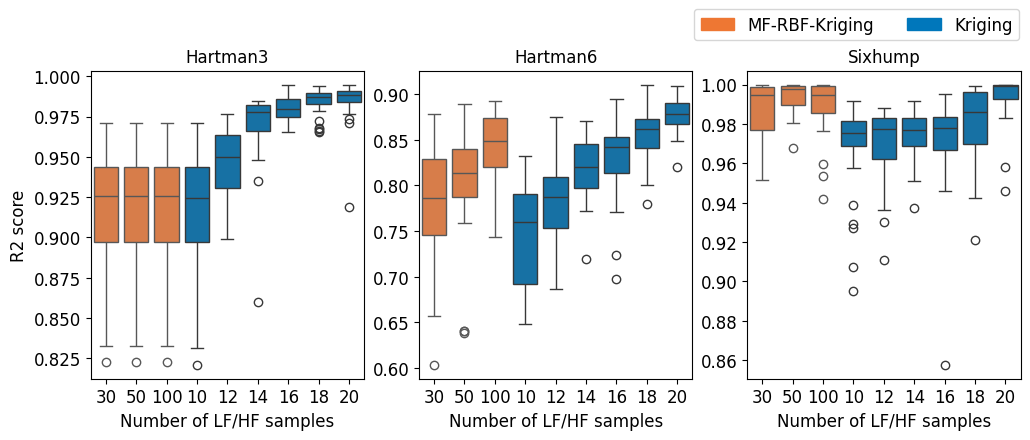

In [120]:
# using boxplot to compare the results between mf-rbf-kriging and kriging
# regarding r2 for three functions (Hartman3, Hartman6, Sixhump)
# create a figure
import matplotlib.patches as mpatches
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# plot Hartman3
sns.boxplot(
    data=mf_rbf_kriging_results_hartman3,
    x="num_lf",
    y="r2",
    color='#EE7733',
    ax=axes[0],
)
sns.boxplot(
    data=kriging_results_hartman3,
    x="num_sample",
    y="r2",
    color='#0077BB',
    ax=axes[0],
)

# plot Hartman6
sns.boxplot(
    data=mf_rbf_kriging_results_hartman6,
    x="num_lf",
    y="r2",
    color="#EE7733",
    ax=axes[1],
)
sns.boxplot(
    data=kriging_results_hartman6,
    x="num_sample",
    y="r2",
    color="#0077BB",
    ax=axes[1],
)
# plot Sixhump
sns.boxplot(
    data=mf_rbf_kriging_results_sixhump,
    x="num_lf",
    y="r2",
    color="#EE7733",
    ax=axes[2])
sns.boxplot(
    data=kriging_results_sixhump,
    x="num_sample",
    y="r2",
    color="#0077BB",
    ax=axes[2],
)
# set title
axes[0].set_title("Hartman3")
axes[1].set_title("Hartman6")
axes[2].set_title("Sixhump")
# set y label
axes[0].set_ylabel("R2 score", fontsize=12)
axes[1].set_ylabel(" ", fontsize=12)
axes[2].set_ylabel(" ", fontsize=12)
# set x label
axes[0].set_xlabel("Number of LF/HF samples", fontsize=12)
axes[1].set_xlabel("Number of LF/HF samples", fontsize=12)
axes[2].set_xlabel("Number of LF/HF samples", fontsize=12)
# set font size
axes[0].tick_params(labelsize=12)
axes[1].tick_params(labelsize=12)
axes[2].tick_params(labelsize=12)
# set legend at the very right of the figure and
# the content of the legend is outside of the figure with used color
# save figure
# plt.legend(["mf-rbf-kriging", "kriging"], bbox_to_anchor=(1.05, 1), loc=2,
#            borderaxespad=0., fontsize=12)
legend2 = mpatches.Patch(color='#0077BB', label='Kriging')
legend1 = mpatches.Patch(color='#EE7733', label='MF-RBF-Kriging')
# legend should be one row on the top of the figure
axes[2].legend(handles=[legend1, legend2], bbox_to_anchor=(0.4, 1.2),
               loc="upper center", ncol=2, borderaxespad=0., fontsize=12)

# save figure
plt.savefig("mf_rbf_kriging_vs_kriging_r2.png", bbox_inches='tight', dpi=300)
plt.savefig("mf_rbf_kriging_vs_kriging_r2.pdf", bbox_inches='tight', dpi=300)
plt.savefig("mf_rbf_kriging_vs_kriging_r2.eps", bbox_inches='tight', dpi=300)
# save figure
plt.show()